In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [4]:
file_path = './netflix_titles.csv'
data = pd.read_csv(file_path)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 결측값 제거*(실행X)

3500개 가량의 행이 없어진다....

In [4]:
data.shape

(8807, 12)

In [5]:
print(data.isna().any(axis=1))

0        True
1        True
2        True
3        True
4        True
        ...  
8802    False
8803     True
8804    False
8805    False
8806    False
Length: 8807, dtype: bool


In [221]:
data = data.dropna(axis=0)

In [222]:
data.shape

(5332, 12)

# 데이터 확인

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 어떤나라의 컨텐츠가 많은가?

왜....정렬이 뒤집히는지 모르겠다.
invert_yaxis()를 사용해서 y축을 뒤집었다.

In [240]:
country = data['country']
country = country.dropna(axis=0)
country = country.str.replace(' ','')

In [241]:
country.value_counts().head(10)

UnitedStates     2818
India             972
UnitedKingdom     419
Japan             245
SouthKorea        199
Canada            181
Spain             145
France            124
Mexico            110
Egypt             106
Name: country, dtype: int64

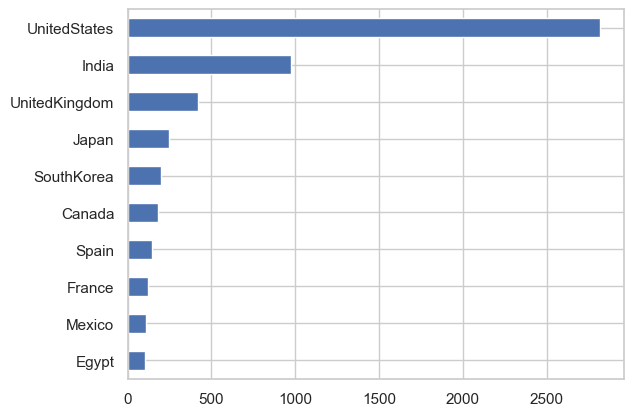

In [242]:
country.value_counts(sort=True).head(10).plot.barh(x='country').invert_yaxis()

In [ ]:
split_nation = []
for i in country[country.str.contains(',')]:
    n_list = i.split(',')
    for j in n_list:
        j = j.replace(' ','')
        split_nation.append(j)
split_nation_si = pd.Series(split_nation)

country_data = country
drop_index = country_data[country_data.str.contains(',')].index
country_data = country_data.drop(index=drop_index)
country_data = country_data.append(split_nation_si)

In [244]:
country_data.value_counts(sort=True).head(10)

UnitedStates     3690
India            1046
UnitedKingdom     806
Canada            445
France            393
Japan             318
Spain             232
SouthKorea        231
Germany           226
Mexico            169
dtype: int64

Text(0.5, 0.98, 'Top 10 by Country')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Exclusive  works by country')

Text(0.5, 1.0, 'Total by country')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Collaborative works by country')

<BarContainer object of 10 artists>

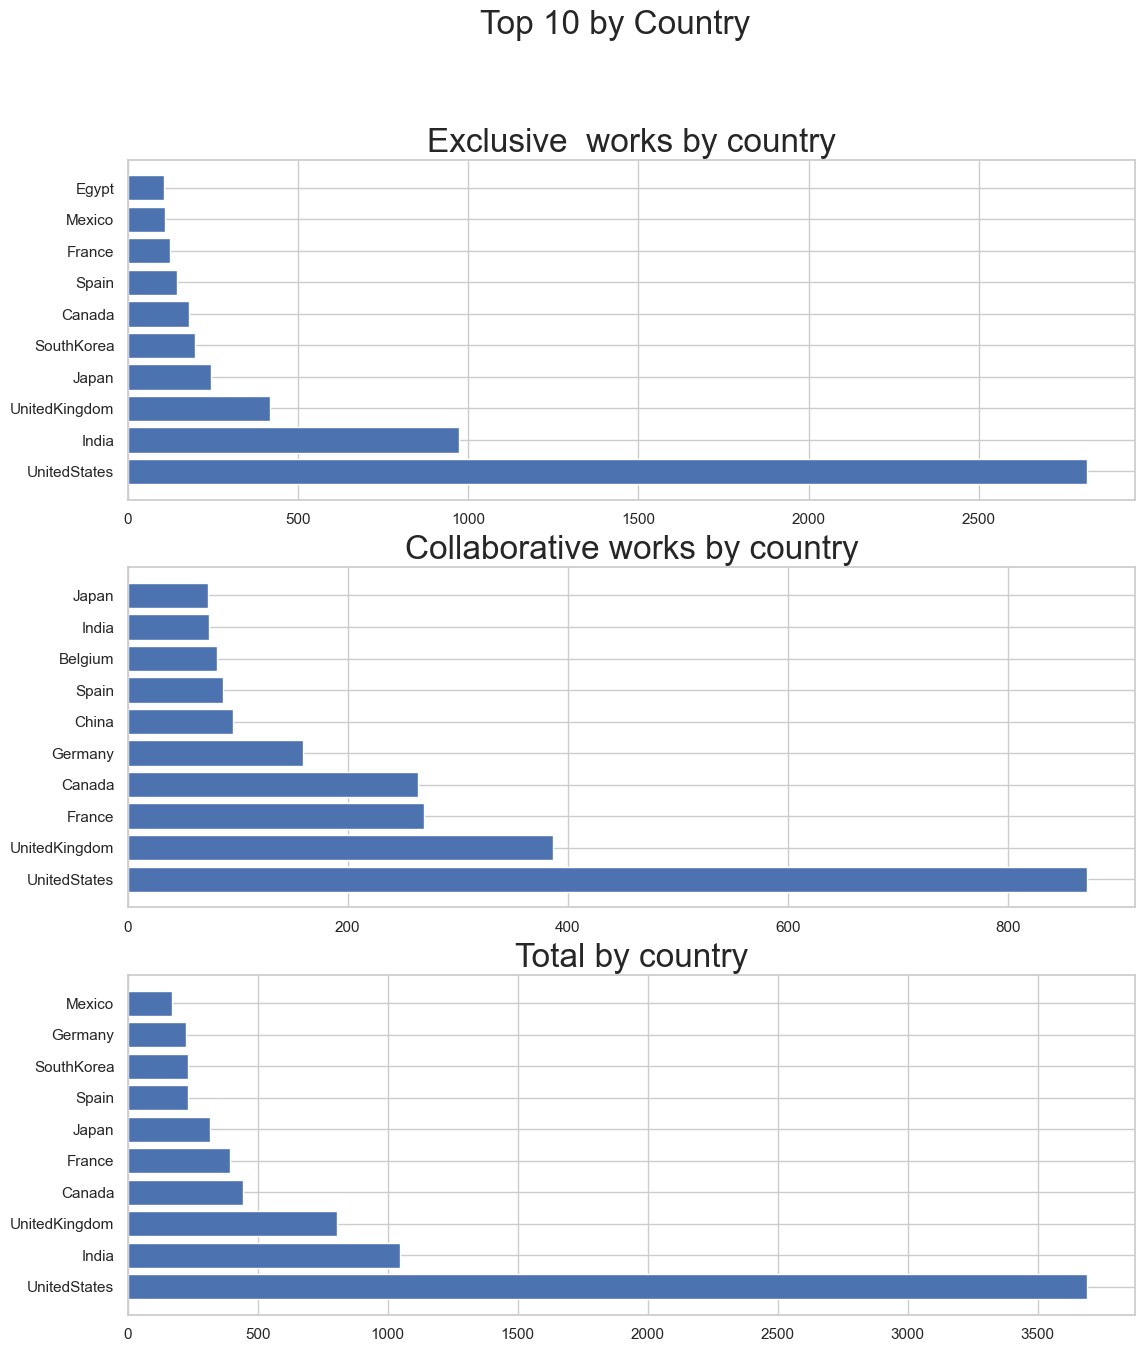

In [303]:
# 다른 나라와 협력을 하는 나라들
ca = split_nation_si.value_counts().head(10)
# 단독으로 제작 하는 나라들
cb = country.value_counts().head(10)
# 전체 합
cc = country_data.value_counts(sort=True).head(10)

fig = plt.figure(figsize=(13,15))
fig.suptitle('Top 10 by Country', fontsize=24)

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,3)
ax3 = fig.add_subplot(3,1,2)

ax1.barh(cb.index, cb.values)
ax1.set_title('Exclusive  works by country', fontsize=24)
ax2.set_title('Total by country', fontsize=24)
ax2.barh(cc.index, cc.values)
ax3.set_title('Collaborative works by country', fontsize=24)
ax3.barh(ca.index, ca.values)

# 장르 분석

In [8]:
listed_in = data['listed_in']
listed_in

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [31]:
split_genre = []
for i in listed_in[listed_in.str.contains(',')]:
    n_list = i.split(',')
    for j in n_list:
        j = j.replace(' ','')
        split_genre.append(j)
split_genre_si = pd.Series(split_genre)

split_genre_si

def split_comma(insert_data):
    split_data = []
    for i in insert_data[insert_data.str.contains(',')]:
        n_list = i.split(',')
        for j in n_list:
            j = j.replace(' ','')
            split_data.append(j)
        return split_data

0         InternationalTVShows
1                     TVDramas
2                  TVMysteries
3                 CrimeTVShows
4         InternationalTVShows
                 ...          
17298    Children&FamilyMovies
17299                 Comedies
17300                   Dramas
17301      InternationalMovies
17302           Music&Musicals
Length: 17303, dtype: object

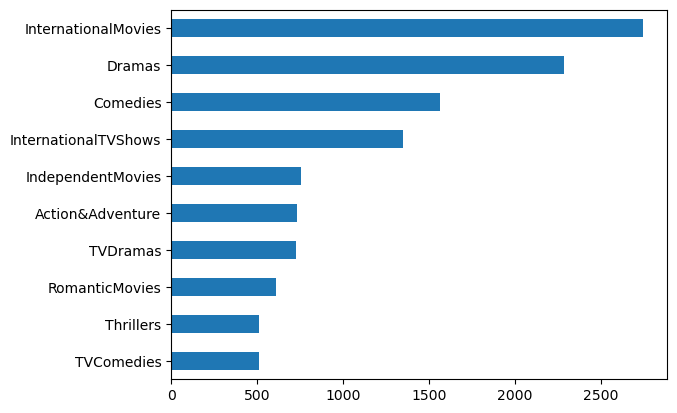

In [10]:
split_genre_si.value_counts(sort=True).head(10).plot.barh(x='genre').invert_yaxis()

# 티비쇼 분리

In [7]:
tv_list = data[data['type'] == 'TV Show']
tv_list

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


# 영화 분리

In [8]:
movie_list =  data[data['type'] == 'Movie']
movie_list

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [9]:
def check_list_in_cell(list_data, check_data):
    if type(list_data) == type(list([])):
        for a in list_data:
            if a == check_data:
                return True
            else:
                return False
    else:
        return False

In [10]:
tv_list = tv_list.dropna(axis='index', how='all', subset=['country','listed_in'])

tv_list['split_country'] = tv_list.country.str.split(',')
tv_list['split_listed_in'] = tv_list.listed_in.str.split(',')

In [11]:
tv_list.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,split_country,split_listed_in
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa],"[International TV Shows, TV Dramas, TV Myste..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,"[Crime TV Shows, International TV Shows, TV ..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,[India],"[International TV Shows, Romantic TV Shows, ..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,NaN,"[TV Dramas, TV Horror, TV Mysteries]"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,[United Kingdom],"[British TV Shows, Reality TV]"
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",NaN,"[Crime TV Shows, Docuseries, International T..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,"[Crime TV Shows, International TV Shows, TV ..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...,NaN,"[British TV Shows, Crime TV Shows, Docuseries]"
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,[United States],"[TV Comedies, TV Dramas]"


In [12]:
tv_list.split_country.apply(lambda x:check_list_in_cell(x,"United States")).sum()

847

In [13]:
tv_list['split_country'].apply(lambda x:check_list_in_cell(x, "United States")).value_counts()

False    1829
True      847
Name: split_country, dtype: int64

In [14]:
def check_list_in(list_data):
    if type(list_data) == type(list([])):
        for a in list_data:
            return a

In [148]:
#group = tv_list.groupby(tv_list['split_country'].map(tuple))


# 티비쇼 중 가장 많은 장르는

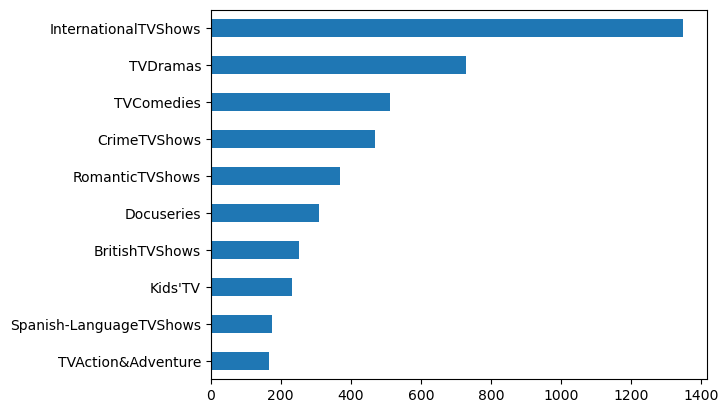

In [28]:
split_tv_genre = []
for i in tv_list['listed_in'][tv_list.listed_in.str.contains(',')]:
    n_list = i.split(',')
    for j in n_list:
        j = j.replace(' ','')
        split_tv_genre.append(j)
split_tv_genre_si = pd.Series(split_tv_genre)
split_tv_genre_si.value_counts(sort=True).head(10).plot.barh(x='genre').invert_yaxis()

# 티비쇼 부분 중 연도별 업데이트 갯수

In [29]:
#넷플릭스 업데이트 연도, 월, 날짜 분리
tv_list[['add_month_day','add_year']]= tv_list['date_added'].str.split(',', n=1, expand=True)
tv_list[['add_month','add_day']] = tv_list['add_month_day'].str.split(' ', n=1, expand=True)

<AxesSubplot:ylabel='add_year'>

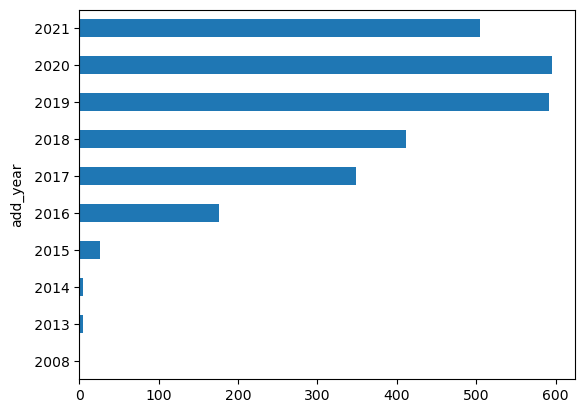

In [21]:
tv_list.groupby('add_year')['title'].count().plot.barh()

# 티비 등급별 작품수

<AxesSubplot:ylabel='rating'>

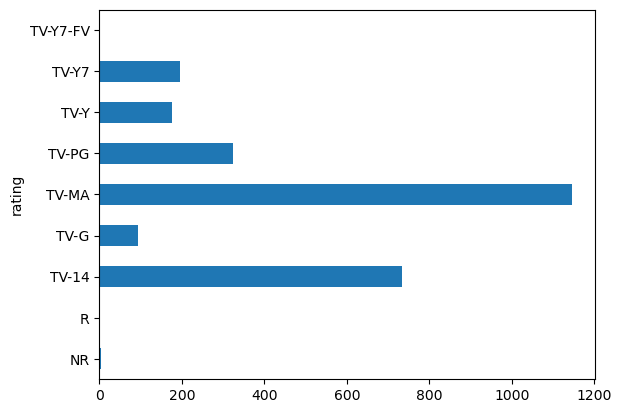

In [30]:
tv_list.groupby('rating')['title'].count().plot.barh()

In [83]:
df_test = tv_list.groupby(['rating','add_year'])['title'].count()
len(df_test.values)

53

In [82]:
len(df_test.index)

53

<Figure size 1000x1500 with 0 Axes>

NotImplementedError: isna is not defined for MultiIndex

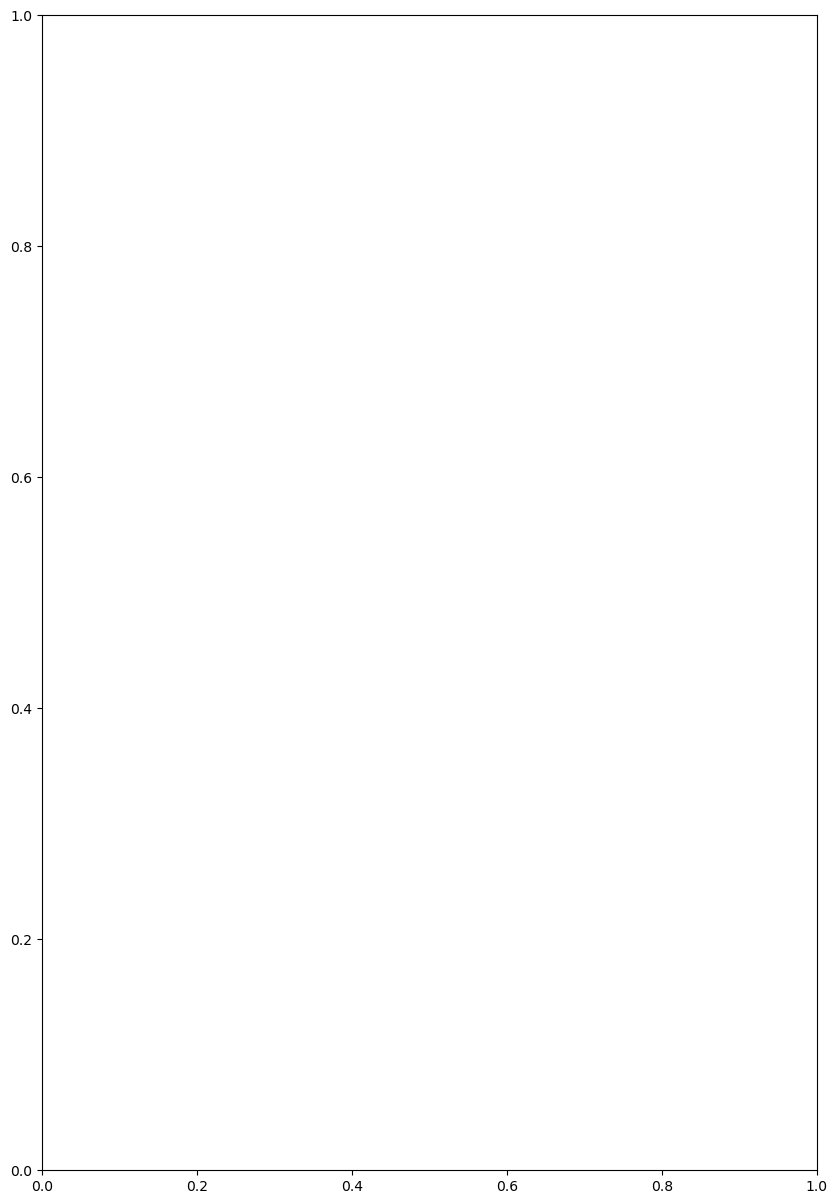

In [84]:
plt.figure(figsize=(10, 15))
ax_rating_year = plt.subplot()
sns.barplot(x=df_test.index, y=df_test.values)
plt.show()